# Data Cleaning and Organization

Combine all of the datasets into full csv dataframes for EDA and modeling use

## Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Clean Demographics Data

In [51]:
demographics = pd.read_csv("./base_data/california_county_data.csv")

In [52]:
demographics.head()

,County,population,Race/Ethnicity: Asian,Race/Ethnicity: AAPI,Race/Ethnicity: Black,Race/Ethnicity: Hispanic,Race/Ethnicity: Multi-Racial/Ethnic,Race/Ethnicity: Hawaiian/ Pacific Island,Race/Ethnicity: White,Labor Force: Unemployment Rate (2018),Poverty: Under 18 Percent (2017),Median Household Income (2017)
0,Alameda,"1,669,301","443,972","457,606","192,977","391,815","69,855","13,634","562,667",3.00%,10.50%,"$95,550.00"
1,Alpine,"1,162",6,6,1,85,22,0,830,4.60%,35.30%,"$55,755.00"
2,Amador,"38,294",454,518,"1,024","5,311","1,021",64,"29,802",4.00%,15.70%,"$60,588.00"
3,Butte,"226,466","10,141",10615,"3,666","35,848","8,801",474,"166,738",4.90%,22.60%,"$48,634.00"
4,Calaveras,"45,117",589,660,371,"5,114","1,320",71,"36,745",4.00%,21.10%,"$58,536.00"


### Clean & Format Data

In [53]:
#remove , and $
demographics = demographics.replace(",","", regex=True)
demographics.iloc[:,-1] = demographics.iloc[:,-1].str[1:]

#clean percentages
demographics.iloc[:,9] = demographics.iloc[:,9].map(lambda x: float(x[:-1])/100)
demographics.iloc[:,10] = demographics.iloc[:,10].map(lambda x: float(x[:-1])/100)


In [54]:
# Set dtype to floats
demographics.iloc[:,1:] = demographics.iloc[:,1:].astype('float')

In [55]:
#Convert Demographics data into percentages
for i in range(2,9):
    demographics.iloc[:,i] = demographics.iloc[:,i]/demographics.iloc[:,1]

In [56]:
#remove space in county name
demographics['County'] = demographics['County'].str.replace(" ", "")

### Rename Columns

In [57]:
#rename columns
col_map = {demographics.columns[i] : "pct_" + demographics.columns[i][16:] for i in range(2,9)}
demographics.rename(col_map, axis=1, inplace=True)

In [58]:
#rename remaining columns
col_map2 = {
    "Labor Force: Unemployment Rate (2018)" : "pct_unemployed_2018",
    "Poverty: Under 18 Percent (2017)" : 'pct_u18_poverty_2017',
    "Median Household Income (2017)" : "median_hh_income_2017"
}
demographics.rename(col_map2, axis=1, inplace=True)

In [59]:
demographics.head(3)

,County,population,pct_Asian,pct_AAPI,pct_Black,pct_Hispanic,pct_Multi-Racial/Ethnic,pct_Hawaiian/ Pacific Island,pct_White,pct_unemployed_2018,pct_u18_poverty_2017,median_hh_income_2017
0,Alameda,1669301.0,0.265963,0.274130,0.115603,0.234718,0.041847,0.008167,0.337067,0.030,0.105,95550.0
1,Alpine,1162.0,0.005164,0.005164,0.000861,0.073150,0.018933,0.000000,0.714286,0.046,0.353,55755.0
2,Amador,38294.0,0.011856,0.013527,0.026740,0.138690,0.026662,0.001671,0.778242,0.040,0.157,60588.0


## Clean base data

In [60]:
codebook_df = pd.read_excel("./base_data/County_codebook.xlsx")
hate_crimes = pd.read_csv("./base_data/Hate-2001-2020.csv")


In [61]:
hate_crimes.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,...,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,1,100,1,1,White,2,Simple Assault,...,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,1,100,2,2,White,1,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,1,100,1,1,White,4,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN
3,CA01-0000000002,2001,9,1,100,1,1,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
4,CA01-0000000004,2001,9,1,100,2,2,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN


### Map County & Agency names to code numbers

In [62]:
#Get County and Agency Data
county_codes = codebook_df['CntyCode'].unique()
counties = codebook_df['County'].unique()

#Created dictionaries for mapping
sliced_counties = []
for county in counties:
    sliced_counties.append(county[:-7])
county_dictionary = {county_codes[i] : sliced_counties[i] for i in range(len(county_codes))}

agency_dictionary = {}
for i in range(codebook_df.shape[0]):
    try:
        agency_dictionary[codebook_df['Code'][i].lstrip('0')] = codebook_df['Agency'][i]
    except:
        agency_dictionary[codebook_df['Code'][i]] = codebook_df['Agency'][i]

#Map Counties and Agencies to respective codes
hate_crimes['County'] = hate_crimes['County'].map(county_dictionary)
hate_crimes['NCIC'] = hate_crimes['NCIC'].map(agency_dictionary)

In [63]:
hate_crimes.head(3)

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,...,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,Alameda,Alameda Co. Sheriff's Department,1,1,White,2,Simple Assault,...,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,Alameda,Alameda Co. Sheriff's Department,2,2,White,1,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,Alameda,Alameda Co. Sheriff's Department,1,1,White,4,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#remove space in County
hate_crimes['County'] = hate_crimes['County'].str.replace(" ", "")

In [65]:
#drop unwanted columns
hate_crimes.drop(hate_crimes.iloc[:, 17:23], axis=1, inplace=True)

#fill NAs
hate_crimes['WeaponType'].fillna('None', inplace=True)
hate_crimes['Offensive_Act'].fillna('Other', inplace=True)

In [66]:
hate_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24436 entries, 0 to 24435
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   RecordId                        24436 non-null  object
 1   ClosedYear                      24436 non-null  int64 
 2   MonthOccurrence                 24436 non-null  int64 
 3   County                          24436 non-null  object
 4   NCIC                            24436 non-null  object
 5   TotalNumberOfVictims            24436 non-null  int64 
 6   TotalNumberOfIndividualVictims  24436 non-null  int64 
 7   SuspectsRaceAsAGroup            24436 non-null  object
 8   TotalNumberOfSuspects           24436 non-null  int64 
 9   MostSeriousUcr                  24436 non-null  object
 10  MostSeriousUcrType              24436 non-null  object
 11  MostSeriousLocation             24436 non-null  object
 12  MostSeriousBias                 24436 non-null

In [67]:
hate_crimes.to_csv("./data/cleaned_hate_crimes.csv", index=False)

## Clean Prosecution Data

In [68]:
prosecution = pd.read_csv("./base_data/Hate-Prosecution-survey-2004-2020.csv")
prosecution.head(3)

,Year,Agency Type,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions
0,2004,County DA,Alameda,2,2,0,2,1,1,1,1,0,0
1,2004,County DA,Alpine,0,0,0,0,0,0,0,0,0,0
2,2004,County DA,Amador,1,1,0,1,0,1,0,0,0,1


In [69]:
prosecution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Year                                            1146 non-null   int64 
 1   Agency Type                                     1146 non-null   object
 2   Agency Name                                     1146 non-null   object
 3   Total Hate Crime Cases Referred                 1050 non-null   object
 4   Total Cases Filed as Hate Crimes                1050 non-null   object
 5   Total Cases Filed as Non-Bias Motivated Crimes  1050 non-null   object
 6   Total Dispositions                              1146 non-null   object
 7   Not Convicted                                   1050 non-null   object
 8   Total Convictions                               1146 non-null   object
 9   Total Hate Crime Convictions                    1146

### Convert Relevant Object Columns to int

In [70]:
# Columns to convert
for col in prosecution.iloc[:, 3:].columns:
    # Change rows with "-" to 0
    prosecution[col] = prosecution[col].str.replace("-", "0")
    # Fill NaNs with 0
    prosecution[col].fillna(0, inplace=True)
    # Change dtype to int
    prosecution[col] = prosecution[col].astype(int)

prosecution.dtypes

Year                                               int64
Agency Type                                       object
Agency Name                                       object
Total Hate Crime Cases Referred                    int64
Total Cases Filed as Hate Crimes                   int64
Total Cases Filed as Non-Bias Motivated Crimes     int64
Total Dispositions                                 int64
Not Convicted                                      int64
Total Convictions                                  int64
Total Hate Crime Convictions                       int64
Guilty plea/Nolo contendere                        int64
Trial Verdict                                      int64
All Other Convictions                              int64
dtype: object

### Group data by Agency Name (county) and aggregate for all years

In [71]:
# Look at Agency Name, mostly counties
prosecution["Agency Name"].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Anaheim', 'Burbank', 'Inglewood',
       'Long Beach', 'Pasadena', 'Torrance', 'Chula Vista', 'Compton',
       'Huntington Beach', 'Oakland', 'Redondo Beach', 'San Rafael',
       'ContraCosta', 'DelNorte', 'ElDorado', 'LosAngeles', 'SanBenito',
       'Sa

In [72]:
prosecution["Agency Type"].unique()

array(['County DA', 'Elected City Attorney'], dtype=object)

In [73]:
# Strip spaces in some counties
prosecution["Agency Name"] = prosecution["Agency Name"].str.replace(" ", "")
prosecution["Agency Name"].unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'ContraCosta', 'DelNorte', 'ElDorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'LosAngeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'SanBenito', 'SanBernardino',
       'SanDiego', 'SanFrancisco', 'SanJoaquin', 'SanLuisObispo',
       'SanMateo', 'SantaBarbara', 'SantaClara', 'SantaCruz', 'Shasta',
       'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter',
       'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo',
       'Yuba', 'Anaheim', 'Burbank', 'Inglewood', 'LongBeach', 'Pasadena',
       'Torrance', 'ChulaVista', 'Compton', 'HuntingtonBeach', 'Oakland',
       'RedondoBeach', 'SanRafael'], dtype=object)

In [74]:
# Drop Elected City Attorneys
prosecution = prosecution[prosecution["Agency Type"] == "County DA"]
prosecution["Agency Type"].unique()

array(['County DA'], dtype=object)

In [75]:
# Groupby and aggregate (sum)
prosecution_all_years = prosecution.drop(columns="Year").groupby(by="Agency Name").sum()
prosecution_all_years.reset_index(inplace=True)

### Visualize counties by number of hate crimes referred

In [76]:
# See counties with most Hate Crimes
prosecution_all_years.sort_values(
    by="Total Hate Crime Cases Referred", ascending=False
).head(20)

,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions
18,LosAngeles,1871,1337,176,954,144,810,457,269,188,353
36,SanDiego,444,295,79,259,5,254,150,144,6,104
37,SanFrancisco,403,235,57,141,20,121,76,66,10,45
29,Orange,371,195,73,191,8,183,152,147,5,31
32,Riverside,335,176,103,179,4,175,94,83,11,81
42,SantaClara,274,127,74,70,3,67,48,47,1,19
55,Ventura,179,117,36,70,4,66,56,45,11,10
0,Alameda,167,116,2,86,11,75,24,24,0,51
33,Sacramento,141,74,26,52,1,51,30,28,2,21
44,Shasta,123,91,27,68,15,53,22,22,0,31


### Merge with Demographics Data


In [77]:
prosecution_demo_all_years = pd.merge(left=prosecution_all_years, right=demographics, left_on='Agency Name', right_on='County')

### Save Clean Prosecution Data

In [78]:
prosecution_all_years.to_csv("./data/prosecution_all_years.csv", index=False)
prosecution_demo_all_years.to_csv("./demographics-data/prosecution_all_years_demographics.csv", index=False)


### Create Prosecution Rate

In [79]:
prosecution_all_years["prosecution-rate"] = prosecution_all_years[
    "Total Dispositions"
].astype(int) / prosecution_all_years["Total Hate Crime Cases Referred"].astype(int)

prosecution_demo_all_years["prosecution-rate"] = prosecution_demo_all_years[
    "Total Dispositions"
].astype(int) / prosecution_demo_all_years["Total Hate Crime Cases Referred"].astype(int)

In [80]:
## Visualize
prosecution_all_years.sort_values(by="prosecution-rate", ascending=False).head(20)

,Agency Name,Total Hate Crime Cases Referred,Total Cases Filed as Hate Crimes,Total Cases Filed as Non-Bias Motivated Crimes,Total Dispositions,Not Convicted,Total Convictions,Total Hate Crime Convictions,Guilty plea/Nolo contendere,Trial Verdict,All Other Convictions,prosecution-rate
14,Kern,43,77,7,64,3,61,19,19,0,42,1.488372
10,Glenn,7,7,0,10,0,10,5,5,0,5,1.428571
13,Inyo,11,8,2,12,0,12,4,4,0,8,1.090909
4,Calaveras,4,4,0,4,1,3,0,0,0,3,1.000000
6,ContraCosta,85,80,12,75,25,50,15,14,1,35,0.882353
54,Tuolumne,7,4,0,6,0,6,5,5,0,1,0.857143
2,Amador,5,5,0,4,0,4,2,2,0,2,0.800000
50,Sutter,5,3,1,4,0,4,1,1,0,3,0.800000
9,Fresno,56,51,10,39,5,34,16,13,3,18,0.696429
35,SanBernardino,118,98,7,79,7,72,14,14,0,58,0.669492


''

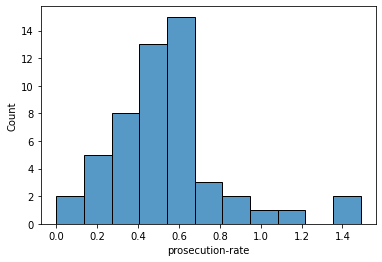

In [81]:
sns.histplot(prosecution_all_years["prosecution-rate"])
;

In [82]:
prosecution_all_years['prosecution-rate'].describe()

count    52.000000
mean      0.549941
std       0.282699
min       0.000000
25%       0.390518
50%       0.531315
75%       0.652174
max       1.488372
Name: prosecution-rate, dtype: float64

Looks fairly normally distributed though a bit skewed

### Create Target variable by mapping prosecution rates to three categories
0 - Prosecution not likely (Low Prosecution Rate)

1 - Prosecution likely (Medium Prosecution Rate)

2 - Prosecution very likely (High Prosecution Rate)

In [83]:
# Check distribution for mapping
prosecution_all_years["prosecution-rate"].describe()

count    52.000000
mean      0.549941
std       0.282699
min       0.000000
25%       0.390518
50%       0.531315
75%       0.652174
max       1.488372
Name: prosecution-rate, dtype: float64

In [84]:
#Create Labels based on 25, 50, and 75 percentiles
# With help from https://stackoverflow.com/questions/33439434/multiple-if-statements-in-a-lambda-function
prosecution_all_years["labels"] = prosecution_all_years["prosecution-rate"].map(
    lambda x: 0
    if x < prosecution_all_years["prosecution-rate"].describe()["25%"]
    else 1
    if x < prosecution_all_years["prosecution-rate"].describe()["75%"]
    else 2
)

In [85]:
prosecution_all_years["labels"].value_counts()

1    24
2    21
0    13
Name: labels, dtype: int64

In [86]:
#add labels to demographics dataframe
prosecution_demo_all_years['labels'] = prosecution_all_years['labels']

### Save Labels

In [87]:
prosecution_labels = prosecution_all_years[["Agency Name", "labels"]]
prosecution_rates = prosecution_all_years[["Agency Name", "prosecution-rate"]]

## Create Main DataFrame

In [88]:
#re-read cleaned data
df = pd.read_csv("./data/cleaned_hate_crimes.csv")
df.head(2)

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act
0,CA01-0000000001,2001,2,Alameda,Alameda Co. Sheriff's Department,1,1,White,2,Simple Assault,Violent Crimes,Bar/Night Club,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs
1,CA01-0000000005,2001,2,Alameda,Alameda Co. Sheriff's Department,2,2,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Graffiti


### Merge with Prosecution data

#### Prosecution Labels

In [89]:
# Merge
modeling_data_l = df.merge(
    prosecution_labels, left_on="County", right_on="Agency Name"
)

In [90]:
#sanity check
print(modeling_data_l['labels'].value_counts())
print(modeling_data_l.shape)

1    17800
0     4123
2     2513
Name: labels, dtype: int64
(24436, 19)


#### Prosecution Rates

In [91]:
# Merge on County
modeling_data_r = df.merge(
    prosecution_rates, left_on="County", right_on="Agency Name"
)

In [92]:
#sanity check
modeling_data_r.shape

(24436, 19)

In [93]:
#drop NAs
modeling_data_r.dropna(inplace=True)
modeling_data_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24413 entries, 0 to 24434
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RecordId                        24413 non-null  object 
 1   ClosedYear                      24413 non-null  int64  
 2   MonthOccurrence                 24413 non-null  int64  
 3   County                          24413 non-null  object 
 4   NCIC                            24413 non-null  object 
 5   TotalNumberOfVictims            24413 non-null  int64  
 6   TotalNumberOfIndividualVictims  24413 non-null  int64  
 7   SuspectsRaceAsAGroup            24413 non-null  object 
 8   TotalNumberOfSuspects           24413 non-null  int64  
 9   MostSeriousUcr                  24413 non-null  object 
 10  MostSeriousUcrType              24413 non-null  object 
 11  MostSeriousLocation             24413 non-null  object 
 12  MostSeriousBias                 

### Merge with Demographics

In [94]:
modeling_data_l.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,MostSeriousUcrType,MostSeriousLocation,MostSeriousBias,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,Agency Name,labels
0,CA01-0000000001,2001,2,Alameda,Alameda Co. Sheriff's Department,1,1,White,2,Simple Assault,Violent Crimes,Bar/Night Club,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,Alameda,1
1,CA01-0000000005,2001,2,Alameda,Alameda Co. Sheriff's Department,2,2,White,1,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Black or African American,Race/Ethnicity/Ancestry,Person,None,Graffiti,Alameda,1
2,CA01-0000000003,2001,5,Alameda,Alameda Co. Sheriff's Department,1,1,White,4,Destruction/Damage/Vandalism,Property Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,None,Daubing of swastika,Alameda,1
3,CA01-0000000002,2001,9,Alameda,Alameda Co. Sheriff's Department,1,1,White,1,Intimidation,Violent Crimes,Residence/Home/Driveway,Anti-Hispanic or Latino,Race/Ethnicity/Ancestry,Person,None,Verbal slurs,Alameda,1
4,CA01-0000000004,2001,9,Alameda,Alameda Co. Sheriff's Department,2,2,White,1,Intimidation,Violent Crimes,Convenience Store,Anti-Other Race/Ethnicity/Ancestry,Race/Ethnicity/Ancestry,Person,None,Verbal slurs,Alameda,1


In [95]:
#merge
modeling_data_l_demo = pd.merge(left=modeling_data_l, right=demographics, on='County')
modeling_data_r_demo = pd.merge(left=modeling_data_r, right=demographics, on='County')

In [96]:
# Drop columns that won't be used in modeling
modeling_data_l.drop(
    columns=["RecordId", "ClosedYear", "County", "NCIC", "Agency Name"], inplace=True
)
modeling_data_r.drop(
    columns=["RecordId", "ClosedYear", "County", "NCIC", "Agency Name"], inplace=True
)

In [99]:
# Drop columns that won't be used in modeling
modeling_data_l_demo.drop(
    columns=["RecordId", "ClosedYear", "County", "NCIC", "Agency Name"], inplace=True
)
modeling_data_r_demo.drop(
    columns=["RecordId", "ClosedYear", "County", "NCIC", "Agency Name"], inplace=True
)

### Save DataFrames

In [100]:
modeling_data_l.to_csv("./data/classification_data.csv", index=False)
modeling_data_r.to_csv("./data/regression_data.csv", index=False)

In [101]:
modeling_data_l_demo.to_csv("./demographics-data/classification_data_demographics.csv", index=False)
modeling_data_r_demo.to_csv("./demographics-data/regression_data_demographics.csv", index=False)